# Analisando e prevendo diabetes com arvores de decisão

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from six import StringIO
import pydotplus
from IPython.display import Image

## Fazendo o download do dataset

In [ ]:
!pip install kaggle
!kaggle datasets download asinow/diabetes-dataset
!unzip diabetes-dataset.zip

In [66]:
df = pd.read_csv('diabetes_dataset.csv')
df.head(5)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


### Legenda

Idade: Idade do indivíduo (18-90 anos).

Gestações: Número de vezes que a paciente engravidou.

IMC (Índice de Massa Corporal): Uma medida de gordura corporal baseada na altura e no peso (kg/m²).

Glicose: Concentração de glicose no sangue (mg/dL), um indicador importante do diabetes.

Pressão arterial: Pressão arterial sistólica (mmHg), níveis mais altos podem indicar hipertensão.

HbA1c: Nível de hemoglobina A1c (%), representando a média de açúcar no sangue ao longo de meses.

LDL (Lipoproteína de Baixa Densidade): Nível de colesterol "ruim" (mg/dL).

HDL (Lipoproteína de Alta Densidade): Nível de colesterol "bom" (mg/dL).

Triglicerídeos: Níveis de gordura no sangue (mg/dL), valores elevados aumentam o risco de diabetes.

Circunferência da Cintura: Medida da cintura (cm), um indicador de obesidade central.

Circunferência do quadril: Medida do quadril (cm), usada para calcular RCQ.

RCQ (Relação Cintura-Quadril): Circunferência da cintura dividida pela circunferência do quadril.

Histórico familiar: indica se o indivíduo tem histórico familiar de diabetes (1 = Sim, 0 = Não).

DietType: Hábitos alimentares (0 = Desequilibrado, 1 = Equilibrado, 2 = Vegano/Vegetariano).

Hipertensão: Presença de pressão arterial elevada (1 = Sim, 0 = Não).

MedicationUse: indica se o indivíduo está tomando medicamentos (1 = Sim, 0 = Não).

Resultado: Resultado do diagnóstico de diabetes (1 = Diabetes, 0 = Sem Diabetes).

## Tratamento de dataset

In [67]:
df = df.dropna()
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [68]:
print ('Total de registros negativos: ', df[df['Outcome'] == 0].shape[0])
print ('Total de registros positivos: ', df[df['Outcome'] == 1].shape[0])

Total de registros negativos:  6256
Total de registros positivos:  3282


In [69]:
Y = df['Outcome'].values
print(Y)

X = df.drop(['Outcome', 'Glucose'], axis=1)
X

[0 0 0 ... 0 1 0]


,Age,Pregnancies,BMI,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse
0,69,5,28.39,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1
1,32,1,26.49,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0
2,89,13,25.34,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1
3,78,13,29.91,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1
4,38,8,24.56,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0
9534,74,0,24.29,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1
9535,75,6,26.10,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1
9536,52,1,25.88,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

## Treinando o modelo

In [71]:
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

modelo = algortimo_arvore.fit(X_train, Y_train)
print(modelo.feature_importances_)

[0.00928353 0.00099238 0.0116034  0.00120993 0.12959601 0.00133452
 0.         0.00117407 0.         0.         0.         0.84480616
 0.         0.         0.        ]


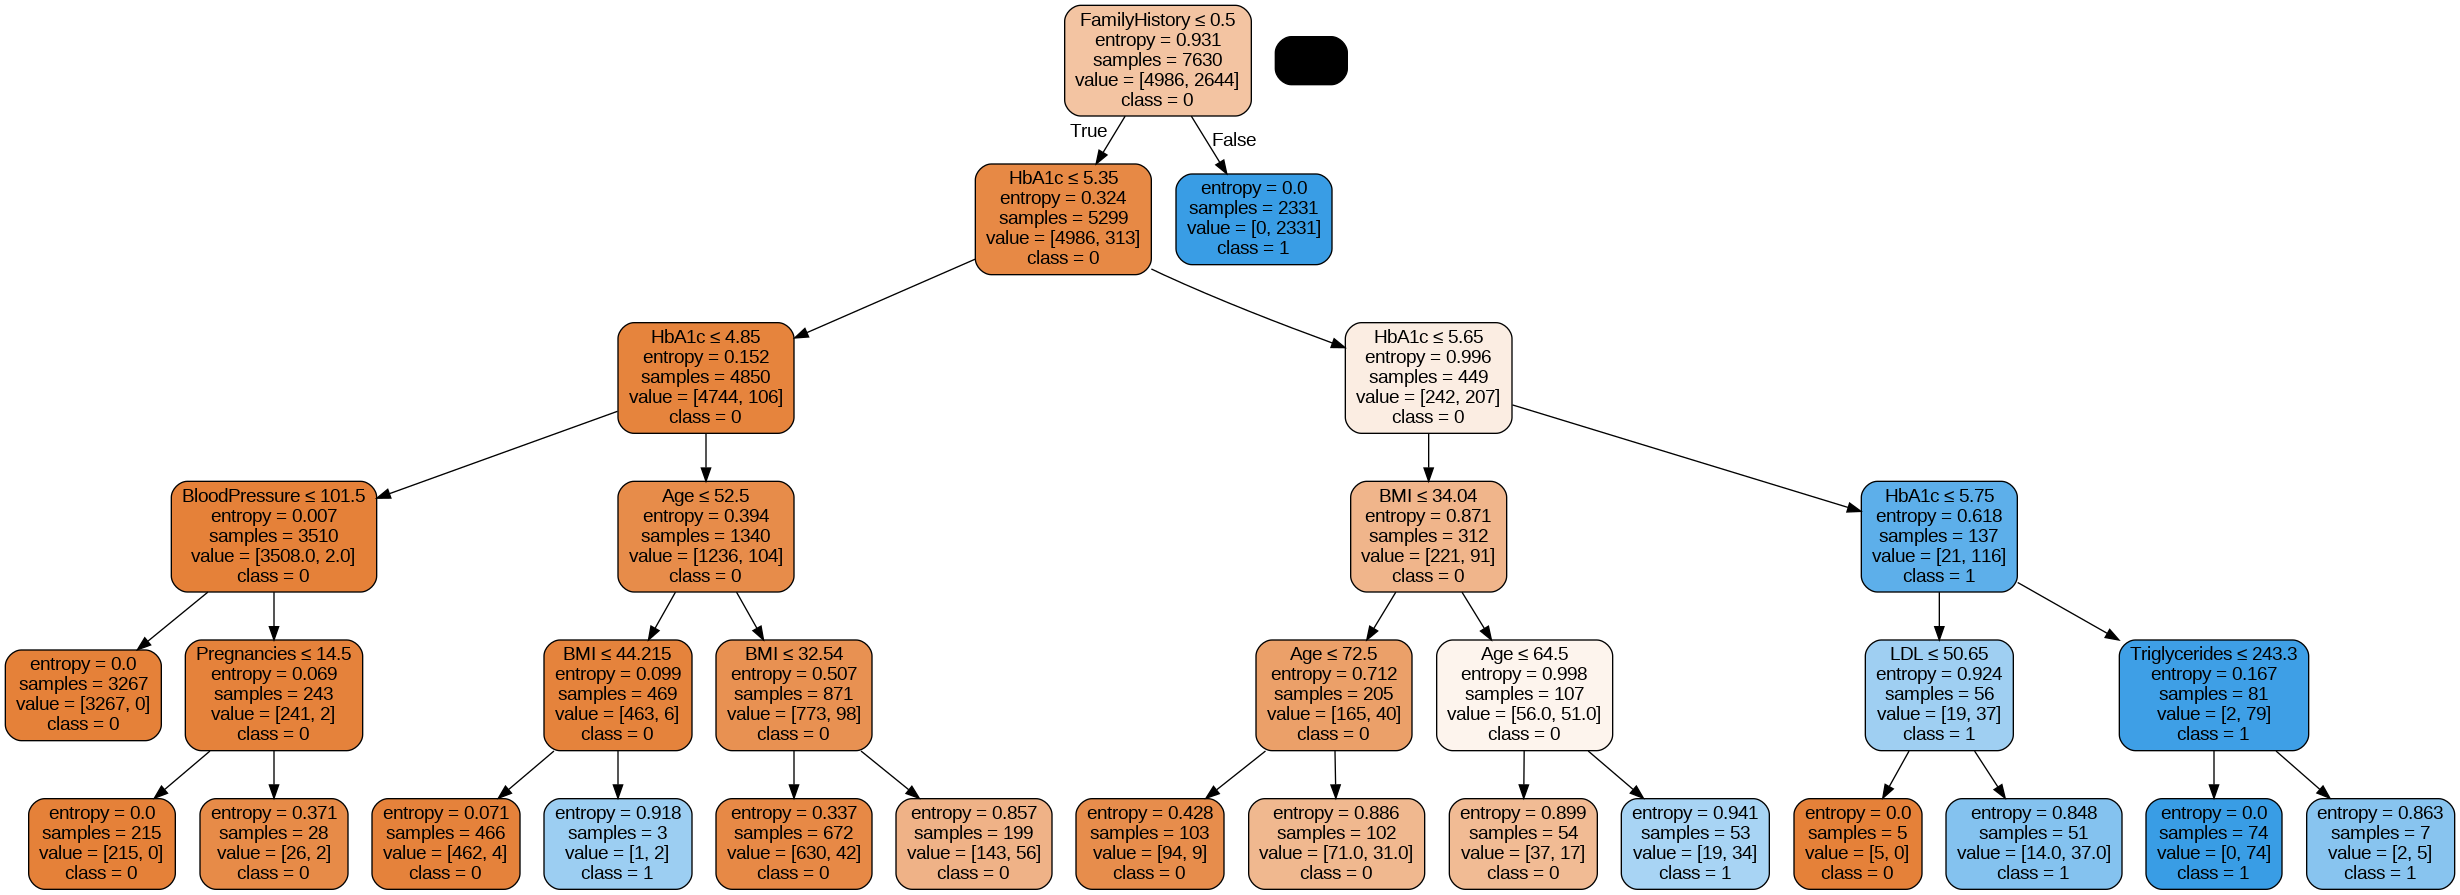

In [72]:
nome_features = ['Age', 'Pregnancies', 'BMI', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR', 'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse']
# Convert nome_classes to a list of strings
nome_classes = [str(c) for c in modelo.classes_]

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

## Testando modelo

In [73]:
Y_predict = modelo.predict(X_test)

print("Acurácia da árvore: ", accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

Acurácia da árvore:  0.9711740041928721
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1270
           1       0.98      0.93      0.96       638

    accuracy                           0.97      1908
   macro avg       0.97      0.96      0.97      1908
weighted avg       0.97      0.97      0.97      1908

